In [3]:
#Base_de_dados_3_6_casas.csv
import pandas as pd
import numpy as np
import time

dataset_process = pd.read_csv("Base_de_dados_3_6_casas.csv", delimiter=';')
X = dataset_process.loc[: , dataset_process.columns != 'Label'].values
y = dataset_process["Label"].values

len(dataset_process.columns)

9

In [4]:
display(dataset_process)

,Kurtosis,Impulse factor,RMS,Margin factor,Skewness,Shape factor,Peak to peak,Crest factor,Label
0,2.330733,8.302993,1.830486,0.006951,-0.098411,652.599342,0.043449,0.012723,0
1,2.463654,8.665077,2.005024,0.006604,-0.022542,654.363553,0.051557,0.013242,0
2,2.258160,8.673627,2.286039,0.005824,-0.082665,651.474711,0.054922,0.013314,0
3,3.033233,11.401023,2.318546,0.007462,-0.069490,658.983054,0.072447,0.017301,0
4,2.510603,9.757039,2.404440,0.006203,-0.075536,654.195816,0.068288,0.014915,0
...,...,...,...,...,...,...,...,...,...
475,2.496437,9.369930,1.848370,0.007762,0.011085,653.097342,0.049579,0.014347,1
476,2.774307,9.350231,1.976207,0.007213,0.035016,655.956386,0.053221,0.014254,1
477,2.922228,9.695664,2.142425,0.006888,-0.020309,656.995447,0.061343,0.014758,1
478,3.462175,14.115464,2.436720,0.008715,-0.032077,664.662046,0.087687,0.021237,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
len(X_train)

384

In [8]:
len(X_test)

96

In [9]:
from sklearn.neural_network import MLPClassifier
rede_neural=MLPClassifier(max_iter=1000, verbose=True,tol=0.0001, activation='relu')
rede_neural.fit(X_train,y_train)

Iteration 1, loss = 22.45035864
Iteration 2, loss = 17.27866889
Iteration 3, loss = 14.41232682
Iteration 4, loss = 10.37057673
Iteration 5, loss = 8.84297798
Iteration 6, loss = 3.85718618
Iteration 7, loss = 4.99067128
Iteration 8, loss = 5.22737862
Iteration 9, loss = 4.75288231
Iteration 10, loss = 3.64954505
Iteration 11, loss = 3.24900301
Iteration 12, loss = 2.19000237
Iteration 13, loss = 2.91145776
Iteration 14, loss = 2.09372732
Iteration 15, loss = 1.95255257
Iteration 16, loss = 1.82426610
Iteration 17, loss = 1.94801462
Iteration 18, loss = 1.41041704
Iteration 19, loss = 1.49849993
Iteration 20, loss = 1.45189579
Iteration 21, loss = 1.38401051
Iteration 22, loss = 1.23113371
Iteration 23, loss = 1.31484044
Iteration 24, loss = 1.17972104
Iteration 25, loss = 1.15512027
Iteration 26, loss = 1.15582893
Iteration 27, loss = 1.06818190
Iteration 28, loss = 1.12971850
Iteration 29, loss = 1.04479525
Iteration 30, loss = 1.05940110
Iteration 31, loss = 1.03018415
Iteration 32,

MLPClassifier(max_iter=1000, verbose=True)

In [11]:
rede_neural.score(X_test, y_test)

0.78125

In [12]:
from sklearn.metrics import confusion_matrix
y_pred = rede_neural.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  7,  4,  1],
       [ 4, 19,  1,  0],
       [ 0,  2, 23,  0],
       [ 1,  0,  1, 14]], dtype=int64)

Text(42.0, 0.5, 'Truth')

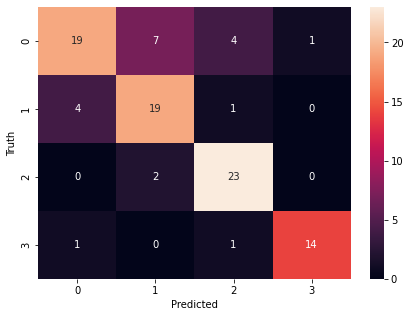

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        31
           1       0.68      0.79      0.73        24
           2       0.79      0.92      0.85        25
           3       0.93      0.88      0.90        16

    accuracy                           0.78        96
   macro avg       0.80      0.80      0.79        96
weighted avg       0.79      0.78      0.78        96



In [16]:
rede_neural.predict([[2,8,2,0.01,-0.15,650,0.05,0.01]])

array([1], dtype=int64)

In [17]:
df0 = dataset_process[:200]
df1 = dataset_process[200:]


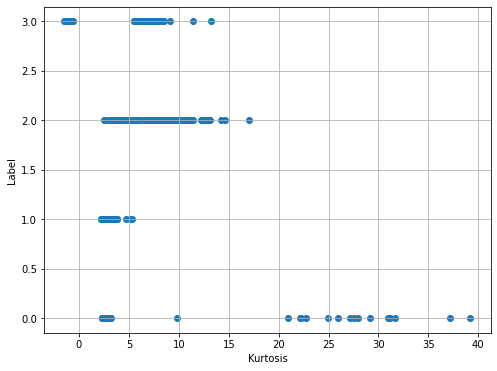

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['Kurtosis'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('Kurtosis')
plt.grid()


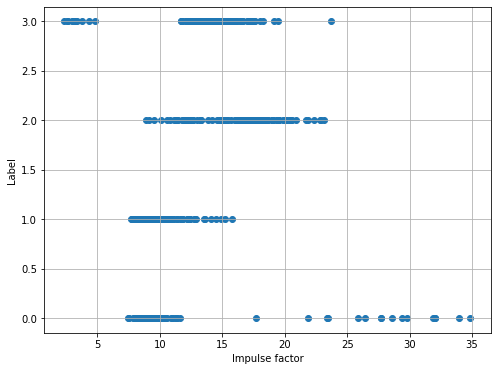

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['Impulse factor'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('Impulse factor')
plt.grid()

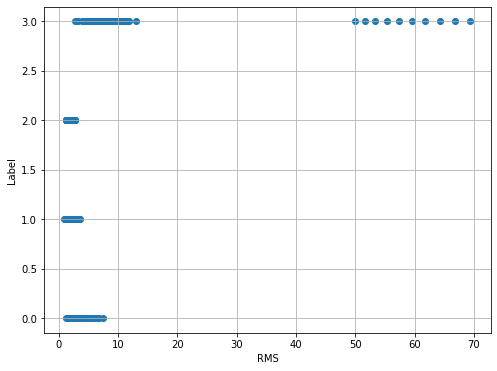

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['RMS'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('RMS')
plt.grid()

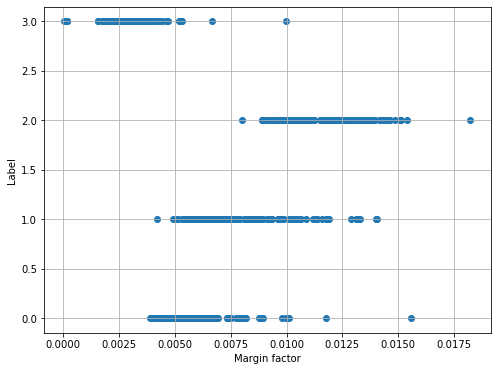

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['Margin factor'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('Margin factor')
plt.grid()

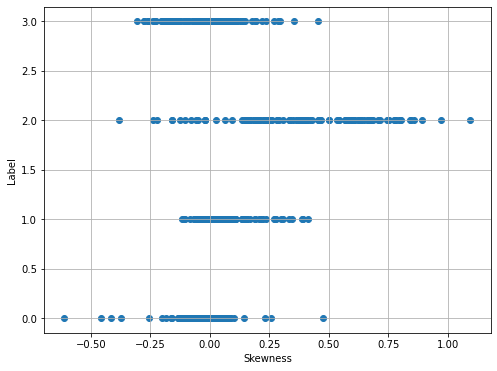

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['Skewness'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('Skewness')
plt.grid()

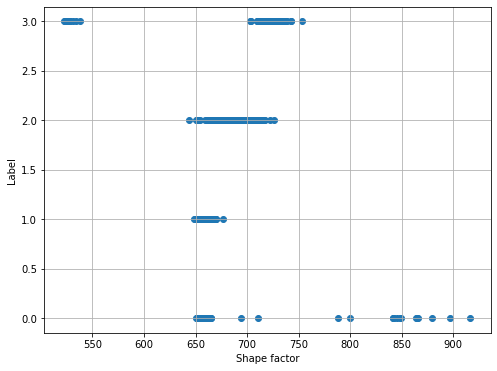

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['Shape factor'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('Shape factor')
plt.grid()

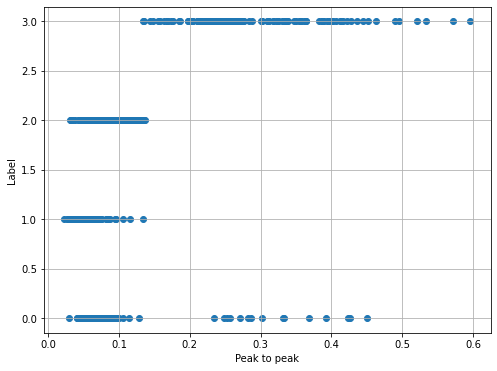

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['Peak to peak'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('Peak to peak')
plt.grid()

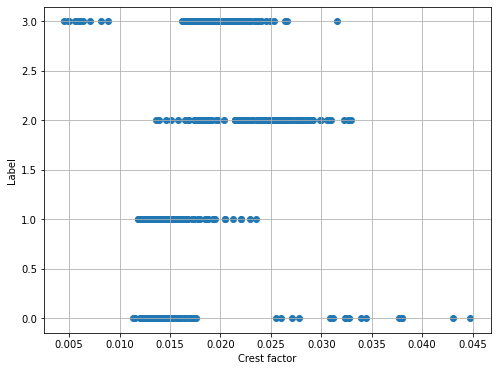

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['Crest factor'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('Crest factor')
plt.grid()

In [26]:
#Base_de_dados_3_6_casas.csv
import pandas as pd
import numpy as np
import time

dataset_process = pd.read_csv("Base_de_dados_3_6_casas.csv", delimiter=';')
X = dataset_process.loc[: , dataset_process.columns != 'Label'].values
y = dataset_process["Label"].values

len(dataset_process.columns)

9

In [70]:
display(dataset_process)

,Kurtosis,Impulse factor,RMS,Margin factor,Skewness,Shape factor,Peak to peak,Crest factor,Label
0,2.330733,8.302993,1.830486,0.006951,-0.098411,652.599342,0.043449,0.012723,0
1,2.463654,8.665077,2.005024,0.006604,-0.022542,654.363553,0.051557,0.013242,0
2,2.258160,8.673627,2.286039,0.005824,-0.082665,651.474711,0.054922,0.013314,0
3,3.033233,11.401023,2.318546,0.007462,-0.069490,658.983054,0.072447,0.017301,0
4,2.510603,9.757039,2.404440,0.006203,-0.075536,654.195816,0.068288,0.014915,0
...,...,...,...,...,...,...,...,...,...
475,2.496437,9.369930,1.848370,0.007762,0.011085,653.097342,0.049579,0.014347,1
476,2.774307,9.350231,1.976207,0.007213,0.035016,655.956386,0.053221,0.014254,1
477,2.922228,9.695664,2.142425,0.006888,-0.020309,656.995447,0.061343,0.014758,1
478,3.462175,14.115464,2.436720,0.008715,-0.032077,664.662046,0.087687,0.021237,1


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [73]:
len(X_train)

360

In [74]:
len(X_test)

120

In [27]:
rede_neural=MLPClassifier(max_iter=1000, verbose=True,tol=0.0001, activation='relu')
rede_neural.fit(X_train,y_train)

Iteration 1, loss = 27.12660937
Iteration 2, loss = 27.12660935
Iteration 3, loss = 27.12660932
Iteration 4, loss = 27.12660929
Iteration 5, loss = 24.84747128
Iteration 6, loss = 20.69553329
Iteration 7, loss = 20.43259874
Iteration 8, loss = 21.67898078
Iteration 9, loss = 21.37108211
Iteration 10, loss = 19.62600379
Iteration 11, loss = 15.23310069
Iteration 12, loss = 12.58603763
Iteration 13, loss = 13.44773594
Iteration 14, loss = 16.27294225
Iteration 15, loss = 16.03157695
Iteration 16, loss = 13.77565091
Iteration 17, loss = 11.75733876
Iteration 18, loss = 12.08988562
Iteration 19, loss = 11.28481927
Iteration 20, loss = 11.75068615
Iteration 21, loss = 11.15279433
Iteration 22, loss = 10.08686547
Iteration 23, loss = 10.85090790
Iteration 24, loss = 10.71594165
Iteration 25, loss = 10.76779506
Iteration 26, loss = 9.86268883
Iteration 27, loss = 7.20413335
Iteration 28, loss = 5.11141631
Iteration 29, loss = 2.19646722
Iteration 30, loss = 5.05875835
Iteration 31, loss = 6.2

Iteration 300, loss = 0.48049719
Iteration 301, loss = 0.46418701
Iteration 302, loss = 0.47916276
Iteration 303, loss = 0.49061666
Iteration 304, loss = 0.48564999
Iteration 305, loss = 0.46604677
Iteration 306, loss = 0.48080221
Iteration 307, loss = 0.46156540
Iteration 308, loss = 0.45785256
Iteration 309, loss = 0.46293939
Iteration 310, loss = 0.46342859
Iteration 311, loss = 0.45376612
Iteration 312, loss = 0.46085270
Iteration 313, loss = 0.45511628
Iteration 314, loss = 0.45349836
Iteration 315, loss = 0.46488495
Iteration 316, loss = 0.44872768
Iteration 317, loss = 0.45428547
Iteration 318, loss = 0.45514839
Iteration 319, loss = 0.44965543
Iteration 320, loss = 0.44905350
Iteration 321, loss = 0.44814451
Iteration 322, loss = 0.44362756
Iteration 323, loss = 0.44513501
Iteration 324, loss = 0.44221974
Iteration 325, loss = 0.44472430
Iteration 326, loss = 0.43889389
Iteration 327, loss = 0.44209582
Iteration 328, loss = 0.43732236
Iteration 329, loss = 0.43745341
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

In [76]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
rede_neural.score(X_test, y_test)

0.8541666666666666

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = rede_neural.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[30,  1,  0,  0],
       [10, 14,  0,  0],
       [ 0,  2, 23,  0],
       [ 0,  0,  1, 15]], dtype=int64)

Text(42.0, 0.5, 'Truth')

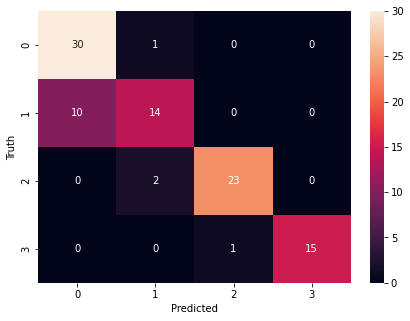

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

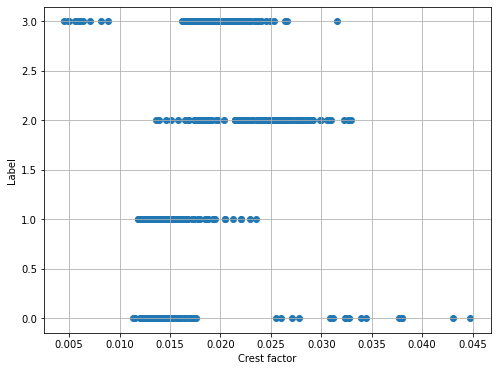

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['Crest factor'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('Crest factor')
plt.grid()

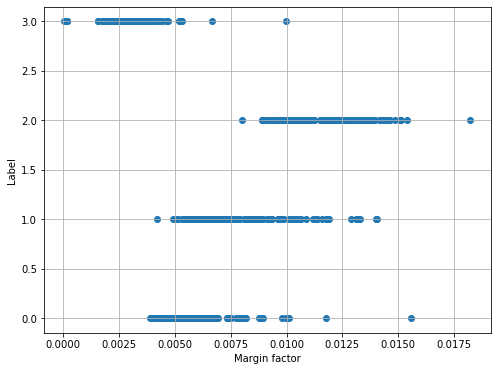

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dataset_process['Margin factor'],dataset_process['Label'])
#plt.scatter(df0['Kurtosis'], df0['Label'],color="green",marker='+')
#plt.scatter(df1['Kurtosis'], df1['Label'],color="blue",marker='.')
plt.ylabel('Label')
plt.xlabel('Margin factor')
plt.grid()

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85        31
           1       0.82      0.58      0.68        24
           2       0.96      0.92      0.94        25
           3       1.00      0.94      0.97        16

    accuracy                           0.85        96
   macro avg       0.88      0.85      0.86        96
weighted avg       0.86      0.85      0.85        96

